This notebook attempts to analyze which dimensions may encode **singular** and **plural noun** information, and similarly, which dimensiosn may encode **singular** and **plural adjective** information. And then analyze whether the same dimension may encode the information of singular and plural of nouns and singular and plural of adjectives at the same time from the obtained results

# result

Dimension which have largest correlation with number: **singular** and **plural**




NOUN :  54 > 310 > 288 > 243 > 278 > 511 > 3 > 119 > 77 > 371

ADJ : 310 > 5 > 54 > 384 > 84 > 278 > 192 > 250 > 385 > 371

Commun dimension  :  310, 54, 278






Comprared with Adj, Noun have bigger  correlation with nb

| dimension | Noun correlation with nb | Adj correlation with nb|
| --- | --- | --- | 
| 310 | 0.458548 | 0.383794 |
| 54  | 0.473204 | 0.338899 |
| 278 | 0.340324 | 0.290632 |




Correlation between dimensions:

| Noun | 310 | 54 | 278 |
| --- | --- | --- | --- | 
| 301 | 1.000000 | 0.332007 | 0.178385 | 


Correlation between dimensions:
| ADJ | 310 | 54 | 278 |
| --- | --- | ---| --- | 
| 310 | 1.000000 | 0.207386 | 0.292527 |

In order to balance the corpus of nouns and adjectives, the following experiments will select respectively 309 singular nouns, 309 plural nouns, 309 singular adjectives, 309  plural adjectives.

In [267]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:

top_freq_n = pd.read_csv('Most Frequent Words/top_frequent_pure_NOUN_FlauBERT.csv', index_col='Word')
top_freq_n

,Rang,lemme,cgram,genre,nombre,freqlemlivres
Word,,,,,,
homme,0,homme,NOM,m,s,1398.85
hommes,1,homme,NOM,m,p,1398.85
jour,2,jour,NOM,m,s,1341.76
jours,3,jour,NOM,m,p,1341.76
oeil,5,oeil,NOM,m,s,1234.59
...,...,...,...,...,...,...
éthylène,48267,éthylène,NOM,m,s,0.00
étiquetage,48269,étiquetage,NOM,m,s,0.00
évangélisation,48274,évangélisation,NOM,f,s,0.00


1000 Singular Nouns

In [27]:

top_sg_n = top_freq_n[top_freq_n["nombre"] == "s"][:309]
top_sg_n

,Rang,lemme,cgram,genre,nombre,freqlemlivres
Word,,,,,,
homme,0,homme,NOM,m,s,1398.85
jour,2,jour,NOM,m,s,1341.76
oeil,5,oeil,NOM,m,s,1234.59
main,8,main,NOM,NaN,s,1229.39
femme,14,femme,NOM,f,s,995.74
...,...,...,...,...,...,...
circonstance,1226,circonstance,NOM,f,s,58.24
rang,1230,rang,NOM,m,s,58.24
territoire,1232,territoire,NOM,m,s,58.24


1000 Plural Nouns

In [28]:
top_pl_n = top_freq_n[top_freq_n["nombre"] == "p"][:309]
top_pl_n

,Rang,lemme,cgram,genre,nombre,freqlemlivres
Word,,,,,,
hommes,1,homme,NOM,m,p,1398.85
jours,3,jour,NOM,m,p,1341.76
mains,9,main,NOM,f,p,1229.39
fois,10,fois,NOM,f,p,1140.00
femmes,15,femme,NOM,f,p,995.74
...,...,...,...,...,...,...
violences,1283,violence,NOM,f,p,56.49
dessins,1287,dessin,NOM,m,p,56.28
récits,1291,récit,NOM,m,p,56.15


In [29]:
all_n_we = pd.read_csv('all_nouns_we.csv', index_col=0)
sg_n_we = all_n_we.merge(top_sg_n, left_index=True, right_index=True)
pl_n_we = all_n_we.merge(top_pl_n, left_index=True, right_index=True)

In [30]:
sg_n_we

,0,1,2,3,4,5,6,7,8,9,...,510,511,gn,gender,Rang,lemme,cgram,genre,nombre,freqlemlivres
absence,3.322297,-0.768149,3.555035,-0.685460,1.201102,-3.151831,-3.592423,1.189369,-2.742928,-2.666739,...,5.123568,-2.381779,singular,feminine,931,absence,NOM,f,s,76.28
accord,-0.732188,-2.024965,1.674970,-4.194049,-2.528312,-2.400746,-4.672920,0.374903,6.015941,-0.066068,...,-5.424189,-6.660925,singular,masculine,442,accord,NOM,m,s,136.15
action,1.376720,-3.602622,0.270682,-7.004842,1.199668,-0.341319,3.974475,-0.292309,2.597899,1.607074,...,3.015040,0.167511,singular,feminine,771,action,NOM,f,s,87.43
air,-0.491568,-1.776510,-0.420017,-5.103687,-2.064307,-1.580656,-1.270584,3.064606,4.021414,-0.273294,...,8.696856,-0.114973,singular,masculine,34,air,NOM,m,s,690.81
allure,3.051527,-2.565099,1.431839,-2.976701,-2.084035,-2.772705,-2.094211,1.903866,4.068268,1.678578,...,0.107989,-1.414938,singular,feminine,1087,allure,NOM,f,s,65.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
époque,-1.408609,-2.313014,1.467428,3.642618,-2.794825,-6.724243,-3.123537,2.466337,-4.937144,-2.049165,...,-2.431347,-6.811773,singular,feminine,432,époque,NOM,f,s,138.51
état,6.066799,-3.826219,2.250722,0.372166,0.489586,-3.801058,-3.119510,2.989726,-6.064237,-4.039576,...,2.295238,-2.403172,singular,masculine,232,état,NOM,m,s,218.18
étude,5.819144,1.250730,3.289566,0.495318,-3.904241,-7.817052,-2.101344,2.162380,1.859624,0.642219,...,8.288882,-3.077851,singular,feminine,1141,étude,NOM,f,s,63.04
événement,-0.693584,-0.753810,0.124109,2.200120,1.585398,-2.354075,-2.994415,1.552121,4.762497,-1.361055,...,0.740749,-3.701469,singular,masculine,800,événement,NOM,m,s,84.59


In [31]:
pl_n_we

,0,1,2,3,4,5,6,7,8,9,...,510,511,gn,gender,Rang,lemme,cgram,genre,nombre,freqlemlivres
abris,3.634584,-4.644015,0.377342,-6.514875,1.314781,-7.105865,1.637559,1.284117,2.511964,1.558493,...,5.123267,0.749750,plural,masculine,1273,abri,NOM,m,p,56.76
absences,3.295355,-0.794079,2.472845,3.223941,5.035848,-4.848855,-4.557629,-2.719433,-1.932022,-6.440993,...,5.919082,0.577700,plural,feminine,932,absence,NOM,f,p,76.28
accords,1.037610,-0.246123,3.333316,-4.094496,0.056898,-2.978131,-4.198946,-2.159259,3.082677,2.101236,...,-5.254343,-6.959417,plural,masculine,443,accord,NOM,m,p,136.15
airs,-3.073402,-1.962807,-4.361338,-0.526964,-1.405528,1.335624,-6.095512,2.331814,3.216961,-3.628428,...,2.839080,-0.816238,plural,masculine,35,air,NOM,m,p,690.81
allures,-0.368381,-8.159948,3.327872,-0.456663,-0.820404,-2.296919,-5.021822,4.406036,1.532774,-0.562674,...,1.081968,1.521198,plural,feminine,1088,allure,NOM,f,p,65.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
études,3.155492,-0.104454,6.523874,-1.430581,-6.250263,-8.157872,-2.711711,-0.706295,-1.090734,-4.388298,...,5.456683,-5.749627,plural,feminine,1142,étude,NOM,f,p,63.04
étés,2.757932,0.903210,0.184015,1.369026,-0.241391,-3.674196,0.942077,-0.553418,-1.468072,-2.633826,...,1.823255,-2.487086,plural,masculine,498,été,NOM,m,p,125.47
événements,-1.245101,-0.820061,1.330310,5.786696,3.966537,-3.242018,-0.265572,2.159446,0.661078,-0.936386,...,1.265242,1.124227,plural,masculine,801,événement,NOM,m,p,84.59
êtres,3.589590,-4.551544,6.088149,2.847501,3.829500,-3.342109,2.749030,-0.169812,1.994654,0.893699,...,0.167977,-1.285041,plural,masculine,514,être,NOM,m,p,122.57


In [32]:
dim_indices = range(512)
avg_values_sg = [sg_n_we[str(i)].mean() for i in dim_indices]
avg_values_pl = [pl_n_we[str(i)].mean() for i in dim_indices]
d = [abs(s-p) for s,p in zip(avg_values_sg, avg_values_pl)]
diff={d[i]:i for i in dim_indices}

sg_avg = pd.DataFrame([avg_values_sg], index=["sg_avg"], columns=dim_indices)
pl_avg = pd.DataFrame([avg_values_pl], index=["pl_avg"], columns=dim_indices)


In [33]:
sg_avg 

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
sg_avg,2.16517,-1.579502,0.502229,-1.610485,0.771038,-2.919544,-2.694495,0.409358,1.264012,0.01364,...,-1.067345,0.764338,0.140874,-2.614315,0.041101,-4.307483,-3.233728,-3.491806,1.383379,-3.150616


In [34]:
pl_avg 

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
pl_avg,1.712646,-1.060523,0.180341,0.306577,1.614202,-3.58591,-2.406433,-0.301847,0.114655,-0.234047,...,-1.555791,0.671422,0.764074,-1.948264,-0.792463,-2.805256,-3.19229,-3.016691,1.664061,-1.295747


In [35]:
diff

{0.4525243953656959: 0,
 0.5189787780032376: 1,
 0.3218883472155344: 2,
 1.9170611891553406: 3,
 0.8431638986177992: 4,
 0.666365963453075: 5,
 0.28806225187055334: 6,
 0.7112052885838188: 7,
 1.1493568875857605: 8,
 0.24768701496116516: 9,
 0.12734094922362504: 10,
 0.2665778480194163: 11,
 0.6275974081300972: 12,
 0.7256109182232984: 13,
 0.1317470398576044: 14,
 0.5616323985126219: 15,
 0.12768960780582503: 16,
 0.6449541146711975: 17,
 0.9281437665178052: 18,
 1.1973440628543721: 19,
 0.13862093104530926: 20,
 1.4710792725951456: 21,
 0.9927367209116504: 22,
 0.35558383357475853: 23,
 0.5808318561974115: 24,
 0.8693496221315224: 25,
 0.5232964679987049: 26,
 0.752613356082784: 27,
 0.5014565323210357: 28,
 0.046174909629773886: 29,
 0.386384408769256: 30,
 0.1874191096343043: 31,
 0.6767078311944972: 32,
 0.692968158281527: 33,
 0.07723594120388344: 34,
 0.12811561751294676: 35,
 0.3169850203786435: 36,
 1.2751566940967638: 37,
 0.21985414350485444: 38,
 0.08121845279281525: 39,
 0

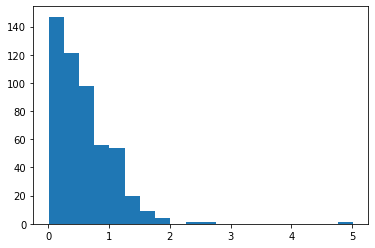

In [36]:
from matplotlib import pyplot as plt 
plt.hist(d, bins=20)
plt.show()

In [37]:
d.sort(reverse=True)
d

[5.012935340453097,
 2.7147141465815556,
 2.4322284639223306,
 1.9170611891553406,
 1.8715031224588996,
 1.8548686021083152,
 1.8447403144724923,
 1.7471826979877,
 1.7291631697721692,
 1.6714288571346296,
 1.647636580749709,
 1.6314922982093842,
 1.5832068276724929,
 1.5682840783213592,
 1.5673638215378614,
 1.5365724818165047,
 1.5055329384411043,
 1.5022264440226563,
 1.4826157053420708,
 1.4710792725951456,
 1.467191411502267,
 1.4537740390754048,
 1.3845235062592212,
 1.383918552116183,
 1.3805893103948197,
 1.3637757725326864,
 1.3394730457585773,
 1.3095495831431394,
 1.2968668291310677,
 1.2943851090629144,
 1.2910960745404516,
 1.2751566940967638,
 1.2637307264676385,
 1.2628117214265355,
 1.2566971256278352,
 1.2561690472669906,
 1.2386293978783176,
 1.233454389980582,
 1.2296071868317158,
 1.2288257663601947,
 1.2269883426990307,
 1.222253982910356,
 1.2197090192459548,
 1.2183642241520998,
 1.2059106203821999,
 1.1973440628543721,
 1.1948465025307435,
 1.1918475512834974,
 

Select 10 dimensions which have the largest average value

In [38]:
n = 10
topn = []
for v in d[:n]:
    print(diff[v], v)
    topn.append(diff[v])

print(topn)

371 5.012935340453097
310 2.7147141465815556
54 2.4322284639223306
3 1.9170611891553406
278 1.8715031224588996
511 1.8548686021083152
119 1.8447403144724923
77 1.7471826979877
288 1.7291631697721692
243 1.6714288571346296
[371, 310, 54, 3, 278, 511, 119, 77, 288, 243]


Select 10 dimensions which have the smallest average value

In [40]:
n = 10
botn = []
for v in d[-n:]:
    print(diff[v], v)
    botn.append(diff[v])

print(botn)

427 0.026566217355987132
87 0.024685179400645296
284 0.016984523980587696
327 0.016612593993527103
157 0.013439455035597181
472 0.012200923226341587
364 0.011157701708640944
241 0.010002759928801286
66 0.006864121558718739
247 0.0033431233394840554
[427, 87, 284, 327, 157, 472, 364, 241, 66, 247]


From the obtained results, we hypothesize that the dimensions 371, 310, 54，278, 3, 511, 119, 77, 288, 143 may encode information about Singular and Plural Nouns.
And the dimensions such 418, 215, 453, 14, 51  don't encode this information.

For test our hypothesis, next we can see the correlation between these dimensions with  Singular Noun and Plural Noun, for do this we can create a new column "nb" in which encoding Singular Noun as 0 and Plural Nouns as 1:

In [59]:
sg_pl_n_we=pd.concat([sg_n_we, pl_n_we])
sg_pl_n_we.loc[sg_pl_n_we['gn'] == 'singular', 'nb'] = 0
sg_pl_n_we.loc[sg_pl_n_we['gn'] == 'plural', 'nb'] = 1
sg_pl_n_we

,0,1,2,3,4,5,6,7,8,9,...,511,gn,gender,Rang,lemme,cgram,genre,nombre,freqlemlivres,nb
absence,3.322297,-0.768149,3.555035,-0.685460,1.201102,-3.151831,-3.592423,1.189369,-2.742928,-2.666739,...,-2.381779,singular,feminine,931,absence,NOM,f,s,76.28,0.0
accord,-0.732188,-2.024965,1.674970,-4.194049,-2.528312,-2.400746,-4.672920,0.374903,6.015941,-0.066068,...,-6.660925,singular,masculine,442,accord,NOM,m,s,136.15,0.0
action,1.376720,-3.602622,0.270682,-7.004842,1.199668,-0.341319,3.974475,-0.292309,2.597899,1.607074,...,0.167511,singular,feminine,771,action,NOM,f,s,87.43,0.0
air,-0.491568,-1.776510,-0.420017,-5.103687,-2.064307,-1.580656,-1.270584,3.064606,4.021414,-0.273294,...,-0.114973,singular,masculine,34,air,NOM,m,s,690.81,0.0
allure,3.051527,-2.565099,1.431839,-2.976701,-2.084035,-2.772705,-2.094211,1.903866,4.068268,1.678578,...,-1.414938,singular,feminine,1087,allure,NOM,f,s,65.88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
études,3.155492,-0.104454,6.523874,-1.430581,-6.250263,-8.157872,-2.711711,-0.706295,-1.090734,-4.388298,...,-5.749627,plural,feminine,1142,étude,NOM,f,p,63.04,1.0
étés,2.757932,0.903210,0.184015,1.369026,-0.241391,-3.674196,0.942077,-0.553418,-1.468072,-2.633826,...,-2.487086,plural,masculine,498,été,NOM,m,p,125.47,1.0
événements,-1.245101,-0.820061,1.330310,5.786696,3.966537,-3.242018,-0.265572,2.159446,0.661078,-0.936386,...,1.124227,plural,masculine,801,événement,NOM,m,p,84.59,1.0
êtres,3.589590,-4.551544,6.088149,2.847501,3.829500,-3.342109,2.749030,-0.169812,1.994654,0.893699,...,-1.285041,plural,masculine,514,être,NOM,m,p,122.57,1.0


In [60]:
sg_pl_n_we


,0,1,2,3,4,5,6,7,8,9,...,511,gn,gender,Rang,lemme,cgram,genre,nombre,freqlemlivres,nb
absence,3.322297,-0.768149,3.555035,-0.685460,1.201102,-3.151831,-3.592423,1.189369,-2.742928,-2.666739,...,-2.381779,singular,feminine,931,absence,NOM,f,s,76.28,0.0
accord,-0.732188,-2.024965,1.674970,-4.194049,-2.528312,-2.400746,-4.672920,0.374903,6.015941,-0.066068,...,-6.660925,singular,masculine,442,accord,NOM,m,s,136.15,0.0
action,1.376720,-3.602622,0.270682,-7.004842,1.199668,-0.341319,3.974475,-0.292309,2.597899,1.607074,...,0.167511,singular,feminine,771,action,NOM,f,s,87.43,0.0
air,-0.491568,-1.776510,-0.420017,-5.103687,-2.064307,-1.580656,-1.270584,3.064606,4.021414,-0.273294,...,-0.114973,singular,masculine,34,air,NOM,m,s,690.81,0.0
allure,3.051527,-2.565099,1.431839,-2.976701,-2.084035,-2.772705,-2.094211,1.903866,4.068268,1.678578,...,-1.414938,singular,feminine,1087,allure,NOM,f,s,65.88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
études,3.155492,-0.104454,6.523874,-1.430581,-6.250263,-8.157872,-2.711711,-0.706295,-1.090734,-4.388298,...,-5.749627,plural,feminine,1142,étude,NOM,f,p,63.04,1.0
étés,2.757932,0.903210,0.184015,1.369026,-0.241391,-3.674196,0.942077,-0.553418,-1.468072,-2.633826,...,-2.487086,plural,masculine,498,été,NOM,m,p,125.47,1.0
événements,-1.245101,-0.820061,1.330310,5.786696,3.966537,-3.242018,-0.265572,2.159446,0.661078,-0.936386,...,1.124227,plural,masculine,801,événement,NOM,m,p,84.59,1.0
êtres,3.589590,-4.551544,6.088149,2.847501,3.829500,-3.342109,2.749030,-0.169812,1.994654,0.893699,...,-1.285041,plural,masculine,514,être,NOM,m,p,122.57,1.0


Test the correlation of "nb" with 10 dimensions of average which have the smallest difference.

In [43]:
sg_pl_n_we.loc[:, [ '427', '87', '284', '327', '157','472','364','241','66','247','nb']].corr()

,427,87,284,327,157,472,364,241,66,247,nb
427,1.000000,-0.149721,0.225742,0.004077,0.031908,-0.080132,-0.005256,0.160114,0.152527,0.079280,0.004655
87,-0.149721,1.000000,-0.001075,-0.129986,-0.239279,-0.034263,-0.088631,-0.029384,0.048896,0.000043,0.004831
284,0.225742,-0.001075,1.000000,-0.100402,-0.125646,-0.166434,-0.092373,-0.075368,-0.144190,-0.129510,0.003260
327,0.004077,-0.129986,-0.100402,1.000000,-0.011732,-0.066084,0.270994,-0.035529,0.059574,-0.088497,-0.003714
157,0.031908,-0.239279,-0.125646,-0.011732,1.000000,0.079122,-0.005477,0.051727,0.230839,-0.234315,-0.002874
472,-0.080132,-0.034263,-0.166434,-0.066084,0.079122,1.000000,0.077120,-0.160022,0.041116,0.122984,0.001843
364,-0.005256,-0.088631,-0.092373,0.270994,-0.005477,0.077120,1.000000,-0.014505,-0.001147,-0.113445,-0.002463
241,0.160114,-0.029384,-0.075368,-0.035529,0.051727,-0.160022,-0.014505,1.000000,0.218538,-0.101768,0.001842
66,0.152527,0.048896,-0.144190,0.059574,0.230839,0.041116,-0.001147,0.218538,1.000000,-0.105789,0.001355
247,0.079280,0.000043,-0.129510,-0.088497,-0.234315,0.122984,-0.113445,-0.101768,-0.105789,1.000000,-0.000639


Smallest correlation with nb : 247, 66, 241,472, 364, 157,327,284,427,87

All these dimenensions have a small correlation with "nb".

Test the correlation of "nb" with 10 dimensions of average which have the largest difference.

In [63]:
sg_pl_n_we.loc[:, [ '371', '310', '54', '3', '278','511','119','77','288','243','nb']].corr()

,371,310,54,3,278,511,119,77,288,243,nb
371,1.000000,0.520632,0.322395,-0.237611,-0.135671,-0.231915,-0.669641,-0.139162,-0.241403,0.476563,-0.194826
310,0.520632,1.000000,0.332007,-0.099252,-0.178385,-0.310605,-0.387434,-0.342295,-0.361935,0.313485,-0.458548
54,0.322395,0.332007,1.000000,-0.234484,-0.326504,-0.251330,-0.247949,-0.171694,-0.246609,0.362297,-0.473204
3,-0.237611,-0.099252,-0.234484,1.000000,0.131617,0.017607,0.257083,0.223468,0.081146,-0.259191,0.292501
278,-0.135671,-0.178385,-0.326504,0.131617,1.000000,0.149943,-0.028221,0.223993,0.094612,-0.348356,0.340324
511,-0.231915,-0.310605,-0.251330,0.017607,0.149943,1.000000,0.206030,0.268146,0.228523,-0.049914,0.303587
119,-0.669641,-0.387434,-0.247949,0.257083,-0.028221,0.206030,1.000000,0.139456,0.273024,-0.267053,0.288786
77,-0.139162,-0.342295,-0.171694,0.223468,0.223993,0.268146,0.139456,1.000000,0.285673,-0.290873,0.274066
288,-0.241403,-0.361935,-0.246609,0.081146,0.094612,0.228523,0.273024,0.285673,1.000000,-0.161797,0.387939
243,0.476563,0.313485,0.362297,-0.259191,-0.348356,-0.049914,-0.267053,-0.290873,-0.161797,1.000000,-0.340573


Largest correlation with nb : 54 > 310 > 288 > 243 > 278 > 511 > 3 > 119 > 77 > 371

Compared to the above dimensions, these dimensions have significantly better correlation  with "nb". 310, 54, 288, 278, 243 have the highest correlation with "nb".

In [276]:
sg_pl_n_we.loc[:, [ '310', '54', '288', '278', '243', '278', '511', '3','119', '77','371', '247', '66','241','364','472']].corr()

,310,54,288,278,243,278,511,3,119,77,371,247,66,241,364,472
310,1.000000,0.332007,-0.361935,-0.178385,0.313485,-0.178385,-0.310605,-0.099252,-0.387434,-0.342295,0.520632,0.027008,-0.135179,0.045552,-0.185595,0.065661
54,0.332007,1.000000,-0.246609,-0.326504,0.362297,-0.326504,-0.251330,-0.234484,-0.247949,-0.171694,0.322395,-0.031779,0.104382,0.115128,-0.111969,-0.145704
288,-0.361935,-0.246609,1.000000,0.094612,-0.161797,0.094612,0.228523,0.081146,0.273024,0.285673,-0.241403,0.107659,0.107960,0.068059,0.005908,-0.040466
278,-0.178385,-0.326504,0.094612,1.000000,-0.348356,1.000000,0.149943,0.131617,-0.028221,0.223993,-0.135671,-0.053090,-0.087703,-0.041920,-0.125279,-0.040061
243,0.313485,0.362297,-0.161797,-0.348356,1.000000,-0.348356,-0.049914,-0.259191,-0.267053,-0.290873,0.476563,0.039384,0.019609,0.064926,-0.143502,0.136664
278,-0.178385,-0.326504,0.094612,1.000000,-0.348356,1.000000,0.149943,0.131617,-0.028221,0.223993,-0.135671,-0.053090,-0.087703,-0.041920,-0.125279,-0.040061
511,-0.310605,-0.251330,0.228523,0.149943,-0.049914,0.149943,1.000000,0.017607,0.206030,0.268146,-0.231915,0.053296,-0.079182,-0.063530,-0.047282,-0.177401
3,-0.099252,-0.234484,0.081146,0.131617,-0.259191,0.131617,0.017607,1.000000,0.257083,0.223468,-0.237611,0.173715,0.011888,0.019734,0.180521,0.143016
119,-0.387434,-0.247949,0.273024,-0.028221,-0.267053,-0.028221,0.206030,0.257083,1.000000,0.139456,-0.669641,0.028689,0.009234,0.017751,0.238161,-0.132463
77,-0.342295,-0.171694,0.285673,0.223993,-0.290873,0.223993,0.268146,0.223468,0.139456,1.000000,-0.139162,0.076890,0.134075,-0.000002,-0.075677,-0.015219


Dimensions with largest correlation: 371 and 310, 310 and 288, 243 and 54, 310 and 77, 243 and 278

In [ ]:
sg_pl_n_we.columns = sg_pl_n_we.columns.str.replace('nombre', 'number')

In [ ]:
sg_pl_n_we.to_csv('sg_pls_n_we.csv')
df=pd.read_csv('sg_pls_n_we.csv') 

# See in dimensions

Test dimensions for lowest correlation with "nb"

Dimension 247,66,241,364,472

In [64]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='472', ylabel='Count'>

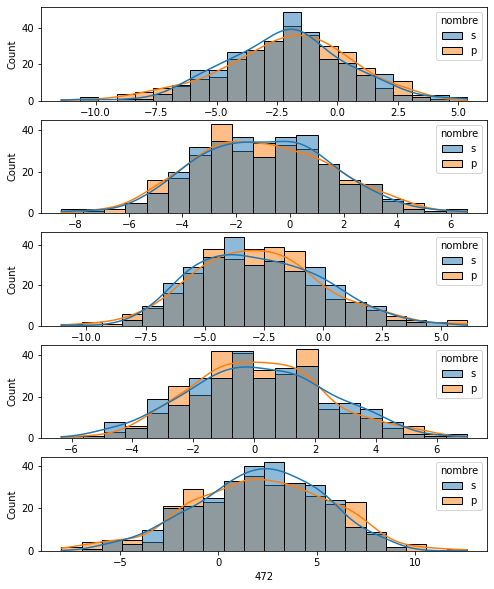

In [74]:
fig, axs = plt.subplots(5,1,figsize=(8,10))
sns.histplot(data=df, x="247", hue="nombre", kde=True, ax=axs[0])
sns.histplot(data=df, x="66", hue="nombre", kde=True, ax=axs[1])
sns.histplot(data=df, x="241", hue="nombre", kde=True, ax=axs[2])
sns.histplot(data=df, x="364", hue="nombre", kde=True, ax=axs[3])
sns.histplot(data=df, x="472", hue="nombre", kde=True, ax=axs[4])

It seems that these dimensions don't encode the information of singular and plural

Test dimensions for largest correlation with "nb"

Dimension: 54, 310, 288, 243,278,511, 3,119,77,371

<AxesSubplot:xlabel='371', ylabel='Count'>

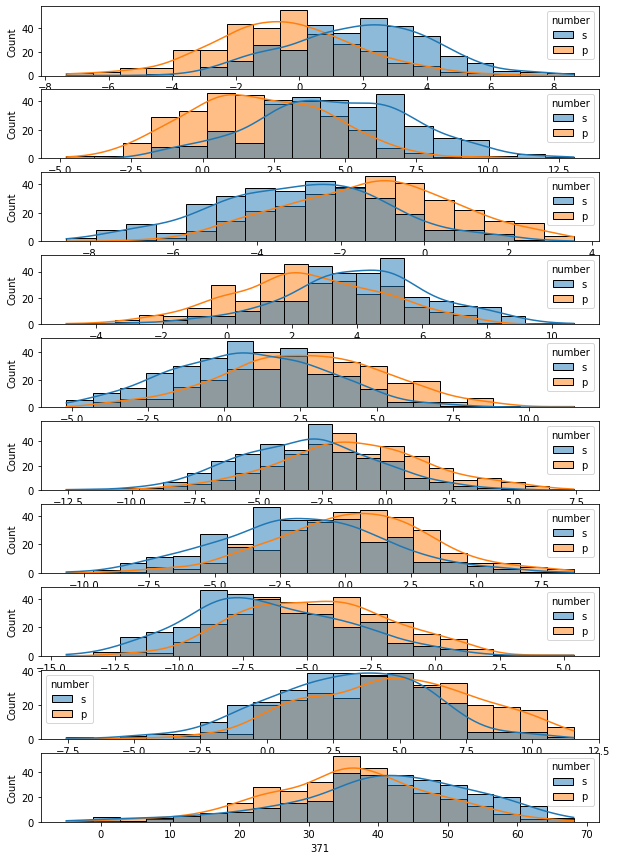

In [286]:
fig, axs = plt.subplots(10,1,figsize=(10,15))
sns.histplot(data=df, x="54", hue="number", kde=True, ax=axs[0])
sns.histplot(data=df, x="310", hue="number", kde=True, ax=axs[1])
sns.histplot(data=df, x="288", hue="number", kde=True, ax=axs[2])
sns.histplot(data=df, x="243", hue="number", kde=True, ax=axs[3])
sns.histplot(data=df, x="278", hue="number", kde=True, ax=axs[4])
sns.histplot(data=df, x="511", hue="number", kde=True, ax=axs[5])
sns.histplot(data=df, x="3", hue="number", kde=True, ax=axs[6])
sns.histplot(data=df, x="119", hue="number", kde=True, ax=axs[7])
sns.histplot(data=df, x="77", hue="number", kde=True, ax=axs[8])
sns.histplot(data=df, x="371", hue="number", kde=True, ax=axs[9])

Dimension 54, 310, 288, 243, 278 seems possible  encode information about singular and plural Noun.

# ADJ

Next we will do the same experiment with adjectives

In [100]:
top_freq_adj = pd.read_csv('Most Frequent Words/top_frequent_pure_ADJ_FlauBERT.csv', index_col='Word')
top_freq_adj

,Unnamed: 0,lemme,cgram,genre,freqlemlivres,number
Word,,,,,,
sûr,26,sûr,ADJ,m,412.97,singular
sûrs,27,sûr,ADJ,m,412.97,plural
aucun,47,aucun,ADJ:ind,m,180.95,singular
léger,61,léger,ADJ,m,151.01,singular
cher,78,cher,ADJ,m,133.65,singular
...,...,...,...,...,...,...
relationnelle,22068,relationnel,ADJ,f,0.00,singular
salariale,22087,salarial,ADJ,f,0.00,singular
sociétale,22108,sociétal,ADJ,f,0.00,singular


In [101]:
top_sg_adj = top_freq_adj[top_freq_adj["number"] == "singular"][:309]
top_sg_adj

,Unnamed: 0,lemme,cgram,genre,freqlemlivres,number
Word,,,,,,
sûr,26,sûr,ADJ,m,412.97,singular
aucun,47,aucun,ADJ:ind,m,180.95,singular
léger,61,léger,ADJ,m,151.01,singular
cher,78,cher,ADJ,m,133.65,singular
tel,85,tel,ADJ:ind,m,115.74,singular
...,...,...,...,...,...,...
imminente,13209,imminent,ADJ,f,7.64,singular
inaperçue,13231,inaperçu,ADJ,f,7.57,singular
bienveillante,13235,bienveillant,ADJ,f,7.50,singular


In [102]:
top_pl_adj = top_freq_adj[top_freq_adj["number"] == "plural"][:309]
top_pl_adj

,Unnamed: 0,lemme,cgram,genre,freqlemlivres,number
Word,,,,,,
sûrs,27,sûr,ADJ,m,412.97,plural
chers,79,cher,ADJ,m,133.65,plural
normaux,164,normal,ADJ,m,62.77,plural
vains,185,vain,ADJ,m,57.03,plural
gais,246,gai,ADJ,m,41.76,plural
...,...,...,...,...,...,...
restrictives,20223,restrictif,ADJ,f,0.20,plural
promotionnelles,20701,promotionnel,ADJ,f,0.14,plural
quantitatives,20710,quantitatif,ADJ,f,0.14,plural


In [103]:
all_adj_we = pd.read_csv('all_adjectives_we.csv', index_col=0)
sg_adj_we = all_adj_we.merge(top_sg_adj, left_index=True, right_index=True)
pl_adj_we = all_adj_we.merge(top_pl_adj, left_index=True, right_index=True)

In [104]:
sg_adj_we

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,Unnamed: 0,lemme,cgram,genre,freqlemlivres,number
abusif,4.867257,0.789795,1.264146,-5.154982,2.566070,1.738820,4.101534,-0.010137,0.905952,0.975548,...,-3.621304,3.065237,0.466652,4.294173,4074,abusif,ADJ,m,1.82,singular
additionnel,-0.616941,-6.087230,1.547413,-4.345960,-5.995902,-4.461722,0.117647,1.059721,7.412957,2.215156,...,-4.569757,0.161442,-0.308504,-1.276925,7600,additionnel,ADJ,m,0.34,singular
adjacent,5.479729,-2.366716,4.206669,-5.540428,0.928443,0.836656,-0.615396,3.815086,5.509338,1.130770,...,-1.085630,-0.102630,-0.292161,-1.544128,5600,adjacent,ADJ,m,0.95,singular
adéquat,2.973334,-2.308775,-0.624867,0.556190,4.157913,-2.216389,-2.466419,1.002295,0.208676,-1.249406,...,-3.604785,-3.884492,1.151281,-4.876080,2043,adéquat,ADJ,m,4.80,singular
aisé,8.850835,-0.002206,4.278875,-2.989154,3.220093,-1.767394,-1.251915,3.012408,-2.121538,1.423463,...,1.109587,-0.850020,-3.543136,0.384168,1331,aisé,ADJ,m,7.77,singular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
éternelle,-0.678022,-3.079195,2.727036,-4.399039,2.790866,1.177965,-4.356398,-1.728209,1.062834,1.278158,...,0.987698,-1.886698,1.152633,-1.243356,12026,éternel,ADJ,f,45.88,singular
étonnante,-0.186054,-5.661340,2.166106,2.146834,2.167503,-3.062837,-3.232288,6.259716,-0.753196,4.111769,...,-1.769989,-5.936738,0.300664,-0.013148,12176,étonnant,ADJ,f,30.00,singular
éventuelle,-2.610230,-3.862970,-0.216105,1.952953,-3.365779,0.195184,-0.672919,-0.463622,6.378855,-3.762104,...,-4.791579,-0.807169,3.241624,2.172905,12626,éventuel,ADJ,f,13.18,singular
évidente,4.817487,-1.732906,4.693172,-1.503866,1.758747,-1.981044,-4.529288,1.008203,0.146850,-0.596633,...,-1.359965,-6.485075,1.532511,-4.370127,12129,évident,ADJ,f,33.58,singular


In [106]:
pl_adj_we

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,Unnamed: 0,lemme,cgram,genre,freqlemlivres,number
abondantes,2.469189,-3.042181,-0.594103,1.006183,8.231537,-4.990061,-1.689534,-3.603422,2.321808,2.781798,...,-0.016274,-4.509098,-2.544398,-1.298414,13344,abondant,ADJ,f,7.03,plural
accueillants,0.576559,-1.515551,4.017187,-0.952490,3.881024,-3.182856,-0.789583,4.141278,0.657677,-0.656314,...,-1.023133,-1.989711,0.480750,3.795453,1941,accueillant,ADJ,m,5.07,plural
additionnelles,-1.906001,-1.936373,-1.148156,-3.933651,1.829767,-7.428360,0.893348,3.207361,6.501829,-0.337551,...,-2.192537,-2.576034,4.537546,1.684395,19266,additionnel,ADJ,f,0.34,plural
additionnels,-1.639899,-2.043320,-2.027816,-2.177728,-4.045338,-4.147024,2.337263,2.441301,7.244435,0.401192,...,-4.491076,-0.360925,0.766329,-0.458547,7601,additionnel,ADJ,m,0.34,plural
adjacentes,2.826725,-1.366994,2.822716,-4.164242,0.131783,-2.770362,-2.895708,1.490072,7.278826,0.694695,...,-2.540189,-1.402581,-3.017852,5.041753,17481,adjacent,ADJ,f,0.95,plural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
éternelles,1.867638,-1.348335,0.897797,-0.578476,4.255240,-0.675513,-6.125883,-2.439762,3.454988,0.431836,...,0.174759,-3.533939,1.028604,-1.422772,12027,éternel,ADJ,f,45.88,plural
étonnantes,2.100773,-2.296238,2.066491,3.788027,2.790904,-5.988153,-2.217326,5.938934,0.327719,1.193367,...,-1.541108,-3.612943,5.448961,1.811032,12177,étonnant,ADJ,f,30.00,plural
éventuelles,-4.537793,-2.413064,-1.959062,0.323099,-0.666984,-3.476775,-0.984208,-4.031217,5.632687,-1.332556,...,-6.807765,-2.607736,4.961835,-0.272189,12627,éventuel,ADJ,f,13.18,plural
évidentes,4.127914,-0.139260,3.736150,1.509428,-0.238839,-3.402861,-4.729940,1.938044,0.244337,-5.802175,...,-1.389882,-7.313276,3.100853,-5.175048,12130,évident,ADJ,f,33.58,plural


In [107]:
dim_indices = range(512)
avg_values_sg = [sg_adj_we[str(i)].mean() for i in dim_indices]
avg_values_pl = [pl_adj_we[str(i)].mean() for i in dim_indices]
d = [abs(singular-plural) for singular,plural in zip(avg_values_sg, avg_values_pl)]
diff={d[i]:i for i in dim_indices}

sg_avg = pd.DataFrame([avg_values_sg], index=["sg_avg"], columns=dim_indices)
pl_avg = pd.DataFrame([avg_values_pl], index=["pl_avg"], columns=dim_indices)

In [108]:
sg_avg

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
sg_avg,2.814697,-2.929863,1.580876,-0.726001,2.329622,-0.965397,-2.045558,0.45846,1.684086,0.706123,...,-1.122445,1.334625,0.219188,-1.169695,-0.834826,-2.511605,-3.15262,-3.003996,0.160265,-1.561479


In [109]:
pl_avg

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
pl_avg,1.925913,-1.784404,1.525104,0.345413,2.118037,-3.350104,-1.578686,-0.231169,0.444235,-0.505486,...,-1.586422,1.992835,0.627458,-1.162478,-1.07065,-2.170203,-3.313694,-3.558386,-0.135456,-0.229058


In [110]:
diff

{0.8887841299417474: 0,
 1.1454598021537203: 1,
 0.055771559629448575: 2,
 1.0714136400080903: 3,
 0.21158528886408012: 4,
 2.384707482249189: 5,
 0.4668724815184464: 6,
 0.6896292473721684: 7,
 1.2398504085048536: 8,
 1.2116084493317154: 9,
 0.32270413199029346: 10,
 0.20907097399417607: 11,
 0.33629395645113236: 12,
 1.0646887116731425: 13,
 0.3195370205857609: 14,
 0.8775375721660166: 15,
 0.5940657908569581: 16,
 0.23531478491909408: 17,
 0.164483029797569: 18,
 0.31580013677087226: 19,
 0.08191880235016358: 20,
 1.261216551113269: 21,
 0.10712049214886754: 22,
 0.5244450495145645: 23,
 1.049176790132686: 24,
 1.163297868998704: 25,
 0.220004456060515: 26,
 0.36179204309682816: 27,
 0.9163670189177995: 28,
 0.7040428060258906: 29,
 0.3472431135511324: 30,
 0.8439227586860849: 31,
 0.7915559296495145: 32,
 0.2064871704313913: 33,
 1.2894134190970872: 34,
 0.2039059290000016: 35,
 0.9060820534045262: 36,
 0.5834314036922336: 37,
 0.9694663652275082: 38,
 0.18217727703883346: 39,
 0.9

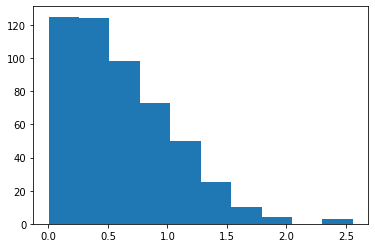

In [111]:
from matplotlib import pyplot as plt 
plt.hist(d, bins=10)
plt.show()

In [112]:
d.sort(reverse=True)
d

[2.5581292152750876,
 2.384707482249189,
 2.3236644984724917,
 1.988863068182201,
 1.8944675590194175,
 1.8651916436699052,
 1.8171725303370527,
 1.790080318152106,
 1.7701297735275032,
 1.7557686605838185,
 1.6754724874304214,
 1.6630373892964418,
 1.6236190275064728,
 1.6047121158446607,
 1.6029430708443368,
 1.5905624531689329,
 1.5440606420711935,
 1.5097011661391613,
 1.5051755603122987,
 1.5049011266359231,
 1.496196469168285,
 1.4627996317637535,
 1.444082312611653,
 1.4260436395514566,
 1.419926624477347,
 1.418749876394822,
 1.4137880093119728,
 1.4084479922071194,
 1.4034291969190942,
 1.3913717633944986,
 1.3910713668122991,
 1.3820998191779932,
 1.3666896433485438,
 1.3481455071889985,
 1.3339652319676376,
 1.3324215945459563,
 1.318914067462619,
 1.3164539576731398,
 1.3127624096330093,
 1.2977853962427162,
 1.2894134190970872,
 1.2808411370485435,
 1.2732303603032364,
 1.2695382202103547,
 1.2676242710959538,
 1.267172470072492,
 1.261216551113269,
 1.2574394987035569,
 1

Select 10 dimensions which have the smallest average value

In [115]:
n = 10
bota = []
for i in d[-n:]:
    print(diff[i], i)
    bota.append(diff[i])

print(bota)

305 0.025121769956957918
348 0.024297666695791253
269 0.020805535951453624
135 0.02060460431067901
279 0.0134100721326873
59 0.01175226537443369
89 0.009228535127508042
505 0.00721673563430425
436 0.004893135696118822
106 0.0016123552394823604
[305, 348, 269, 135, 279, 59, 89, 505, 436, 106]


Select 10 dimensions which have the largest average value

In [113]:
n = 10
topa = []
for i in d[:n]:
    print(diff[i], i)
    topa.append(diff[i])

print(topa)

371 2.5581292152750876
5 2.384707482249189
310 2.3236644984724917
84 1.988863068182201
54 1.8944675590194175
385 1.8651916436699052
384 1.8171725303370527
192 1.790080318152106
250 1.7701297735275032
278 1.7557686605838185
[371, 5, 310, 84, 54, 385, 384, 192, 250, 278]


In [116]:
sg_pl_adj_we=pd.concat([sg_adj_we, pl_adj_we])
sg_pl_adj_we.loc[sg_pl_adj_we['number'] == 'singular', 'nb'] = 0
sg_pl_adj_we.loc[sg_pl_adj_we['number'] == 'plural', 'nb'] = 1
sg_pl_adj_we

,0,1,2,3,4,5,6,7,8,9,...,509,510,511,Unnamed: 0,lemme,cgram,genre,freqlemlivres,number,nb
abusif,4.867257,0.789795,1.264146,-5.154982,2.566070,1.738820,4.101534,-0.010137,0.905952,0.975548,...,3.065237,0.466652,4.294173,4074,abusif,ADJ,m,1.82,singular,0.0
additionnel,-0.616941,-6.087230,1.547413,-4.345960,-5.995902,-4.461722,0.117647,1.059721,7.412957,2.215156,...,0.161442,-0.308504,-1.276925,7600,additionnel,ADJ,m,0.34,singular,0.0
adjacent,5.479729,-2.366716,4.206669,-5.540428,0.928443,0.836656,-0.615396,3.815086,5.509338,1.130770,...,-0.102630,-0.292161,-1.544128,5600,adjacent,ADJ,m,0.95,singular,0.0
adéquat,2.973334,-2.308775,-0.624867,0.556190,4.157913,-2.216389,-2.466419,1.002295,0.208676,-1.249406,...,-3.884492,1.151281,-4.876080,2043,adéquat,ADJ,m,4.80,singular,0.0
aisé,8.850835,-0.002206,4.278875,-2.989154,3.220093,-1.767394,-1.251915,3.012408,-2.121538,1.423463,...,-0.850020,-3.543136,0.384168,1331,aisé,ADJ,m,7.77,singular,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
éternelles,1.867638,-1.348335,0.897797,-0.578476,4.255240,-0.675513,-6.125883,-2.439762,3.454988,0.431836,...,-3.533939,1.028604,-1.422772,12027,éternel,ADJ,f,45.88,plural,1.0
étonnantes,2.100773,-2.296238,2.066491,3.788027,2.790904,-5.988153,-2.217326,5.938934,0.327719,1.193367,...,-3.612943,5.448961,1.811032,12177,étonnant,ADJ,f,30.00,plural,1.0
éventuelles,-4.537793,-2.413064,-1.959062,0.323099,-0.666984,-3.476775,-0.984208,-4.031217,5.632687,-1.332556,...,-2.607736,4.961835,-0.272189,12627,éventuel,ADJ,f,13.18,plural,1.0
évidentes,4.127914,-0.139260,3.736150,1.509428,-0.238839,-3.402861,-4.729940,1.938044,0.244337,-5.802175,...,-7.313276,3.100853,-5.175048,12130,évident,ADJ,f,33.58,plural,1.0


In [119]:
sg_pl_adj_we.loc[:, [ '371', '5', '310', '84', '54','385','384','192','250','278','nb']].corr()

,371,5,310,84,54,385,384,192,250,278,nb
371,1.000000,-0.168453,0.480712,0.018934,0.178011,-0.002716,0.481750,-0.084943,0.342104,-0.169052,-0.093436
5,-0.168453,1.000000,0.047901,-0.098304,-0.047198,0.070337,-0.112842,-0.377981,-0.129943,-0.007474,-0.383531
310,0.480712,0.047901,1.000000,-0.232729,0.207386,0.056905,0.244617,-0.213517,-0.002241,-0.292527,-0.383794
84,0.018934,-0.098304,-0.232729,1.000000,-0.206391,0.006578,0.090300,0.087627,0.098999,0.233898,0.292875
54,0.178011,-0.047198,0.207386,-0.206391,1.000000,-0.036264,-0.176475,-0.054619,-0.153555,-0.172667,-0.338899
385,-0.002716,0.070337,0.056905,0.006578,-0.036264,1.000000,-0.059424,-0.020550,0.056447,-0.186230,-0.263689
384,0.481750,-0.112842,0.244617,0.090300,-0.176475,-0.059424,1.000000,0.010634,0.339518,-0.137490,0.301979
192,-0.084943,-0.377981,-0.213517,0.087627,-0.054619,-0.020550,0.010634,1.000000,-0.021612,0.210370,0.289995
250,0.342104,-0.129943,-0.002241,0.098999,-0.153555,0.056447,0.339518,-0.021612,1.000000,0.075938,0.288955
278,-0.169052,-0.007474,-0.292527,0.233898,-0.172667,-0.186230,-0.137490,0.210370,0.075938,1.000000,0.290632


Dimension with largest correlation with nb: 310 > 5 > 54 > 384 > 84 > 278 > 192 > 250 > 385 > 371


In [120]:
sg_pl_adj_we.loc[:, [ '305', '348', '269', '135', '279','59','89','505','436','106','nb']].corr()

,305,348,269,135,279,59,89,505,436,106,nb
305,1.000000,0.226167,0.102446,-0.035907,0.154129,0.033158,-0.113696,0.031050,-0.076228,0.120224,-0.005494
348,0.226167,1.000000,0.290238,-0.008189,0.185840,-0.048606,0.092698,0.034721,0.002348,0.185727,-0.004160
269,0.102446,0.290238,1.000000,0.040088,0.167630,0.035064,0.051398,0.018211,0.051612,0.060570,-0.003063
135,-0.035907,-0.008189,0.040088,1.000000,-0.111063,0.142912,0.071411,-0.136623,0.026827,0.053679,0.003895
279,0.154129,0.185840,0.167630,-0.111063,1.000000,0.067925,0.002054,-0.124244,-0.130178,0.062681,-0.002492
59,0.033158,-0.048606,0.035064,0.142912,0.067925,1.000000,-0.123758,-0.123340,-0.297720,-0.109347,-0.002163
89,-0.113696,0.092698,0.051398,0.071411,0.002054,-0.123758,1.000000,-0.069491,-0.020694,-0.011099,0.001860
505,0.031050,0.034721,0.018211,-0.136623,-0.124244,-0.123340,-0.069491,1.000000,-0.051564,0.119603,0.001373
436,-0.076228,0.002348,0.051612,0.026827,-0.130178,-0.297720,-0.020694,-0.051564,1.000000,-0.055190,0.000787
106,0.120224,0.185727,0.060570,0.053679,0.062681,-0.109347,-0.011099,0.119603,-0.055190,1.000000,0.000280


Dimention with smallest correlation with nb: 106 < 436 < 505 < 89 < 59 < 279 < 269 < 135 < 348 < 305


In [287]:
sg_pl_adj_we.loc[:, [ '310', '54', '5', '384', '84','278', '192','250','385','371', '106', '436','505','89','59']].corr()

,310,54,5,384,84,278,192,250,385,371,106,436,505,89,59
310,1.000000,0.207386,0.047901,0.244617,-0.232729,-0.292527,-0.213517,-0.002241,0.056905,0.480712,-0.120798,-0.236587,-0.090714,0.061710,0.052472
54,0.207386,1.000000,-0.047198,-0.176475,-0.206391,-0.172667,-0.054619,-0.153555,-0.036264,0.178011,-0.010717,-0.038322,-0.035731,0.102960,0.006232
5,0.047901,-0.047198,1.000000,-0.112842,-0.098304,-0.007474,-0.377981,-0.129943,0.070337,-0.168453,-0.066151,0.102769,0.008117,0.112898,-0.009569
384,0.244617,-0.176475,-0.112842,1.000000,0.090300,-0.137490,0.010634,0.339518,-0.059424,0.481750,0.063162,-0.090109,-0.148060,-0.061997,0.018317
84,-0.232729,-0.206391,-0.098304,0.090300,1.000000,0.233898,0.087627,0.098999,0.006578,0.018934,0.102807,0.104718,0.133077,-0.206582,-0.008173
278,-0.292527,-0.172667,-0.007474,-0.137490,0.233898,1.000000,0.210370,0.075938,-0.186230,-0.169052,0.017843,0.217735,0.251125,0.015211,-0.232397
192,-0.213517,-0.054619,-0.377981,0.010634,0.087627,0.210370,1.000000,-0.021612,-0.020550,-0.084943,-0.064492,0.173471,-0.060082,-0.132349,-0.057869
250,-0.002241,-0.153555,-0.129943,0.339518,0.098999,0.075938,-0.021612,1.000000,0.056447,0.342104,-0.124434,-0.036812,-0.228692,0.082084,-0.064754
385,0.056905,-0.036264,0.070337,-0.059424,0.006578,-0.186230,-0.020550,0.056447,1.000000,-0.002716,0.085443,0.119468,-0.071821,-0.028152,0.003207
371,0.480712,0.178011,-0.168453,0.481750,0.018934,-0.169052,-0.084943,0.342104,-0.002716,1.000000,-0.003394,-0.138693,-0.217420,-0.128498,0.010289


Dimensions with largest correlation: 310 and 371, 192 and 5, 384 and 250,  310 and 278, 310 and 384, 310 and 84 

In [ ]:
sg_pl_adj_we= sg_pl_adj_we.replace(['singular','plural'],['s','p'])
sg_pl_adj_we= sg_pl_adj_we.replace('ADJ:ind','ADJ')

In [155]:
sg_pl_adj_we.to_csv('sg_pls_adjs_we.csv')
df_a=pd.read_csv('sg_pls_adjs_we.csv') 

In [126]:
import seaborn as sns
from matplotlib import pyplot as plt

dimention with smallest correlation with nb: 106,436,505,89,59

<AxesSubplot:xlabel='59', ylabel='Count'>

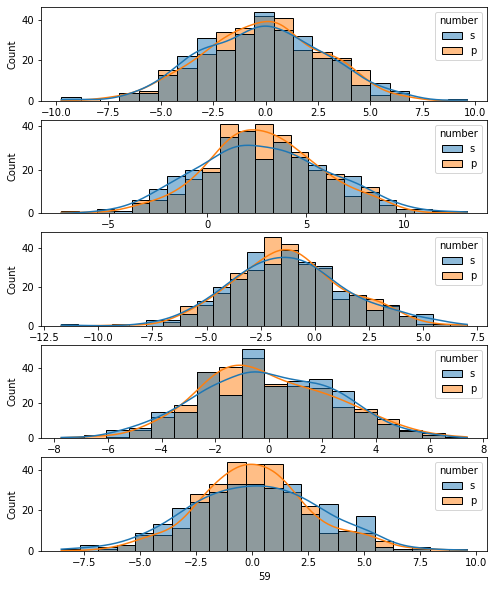

In [129]:
fig, axs = plt.subplots(5,1,figsize=(8,10))
sns.histplot(data=df_a, x="106", hue="number", kde=True, ax=axs[0])
sns.histplot(data=df_a, x="436", hue="number", kde=True, ax=axs[1])
sns.histplot(data=df_a, x="505", hue="number", kde=True, ax=axs[2])
sns.histplot(data=df_a, x="89", hue="number", kde=True, ax=axs[3])
sns.histplot(data=df_a, x="59", hue="number", kde=True, ax=axs[4])

It seems that these dimensions don't encode the information for sigular adj and plural adj 

dimention with largest correlation with nb: 310,5,54,384,84

310 > 5 > 54 > 384 > 84 > 278 > 192 > 250 > 385 > 371

<AxesSubplot:xlabel='371', ylabel='Count'>

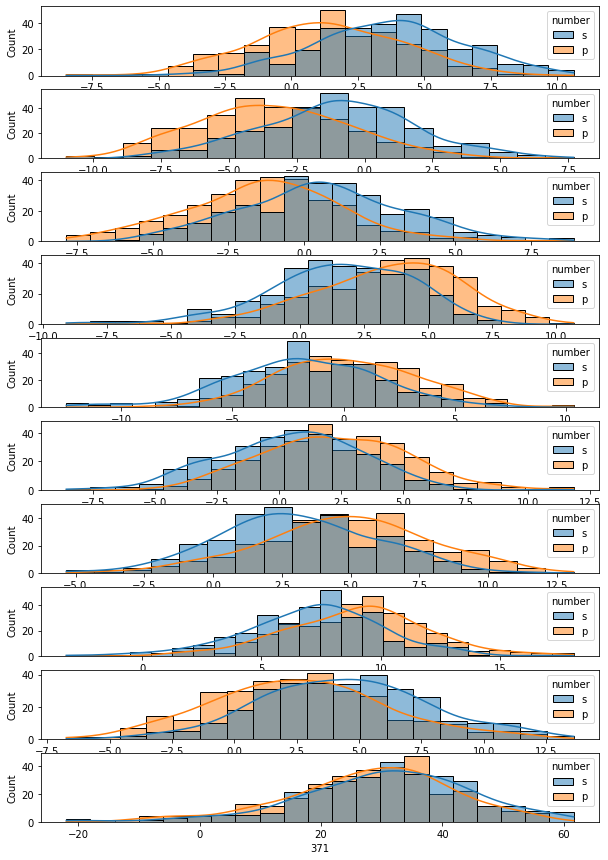

In [291]:
fig, axs = plt.subplots(10,1,figsize=(10,15))
sns.histplot(data=df_a, x="310", hue="number", kde=True, ax=axs[0])
sns.histplot(data=df_a, x="5", hue="number", kde=True, ax=axs[1])
sns.histplot(data=df_a, x="54", hue="number", kde=True, ax=axs[2])
sns.histplot(data=df_a, x="384", hue="number", kde=True, ax=axs[3])
sns.histplot(data=df_a, x="84", hue="number", kde=True, ax=axs[4])
sns.histplot(data=df_a, x="278", hue="number", kde=True, ax=axs[5])
sns.histplot(data=df_a, x="192", hue="number", kde=True, ax=axs[6])
sns.histplot(data=df_a, x="250", hue="number", kde=True, ax=axs[7])
sns.histplot(data=df_a, x="385", hue="number", kde=True, ax=axs[8])
sns.histplot(data=df_a, x="371", hue="number", kde=True, ax=axs[9])



Dimension 310, 5, 54, 384, 192 possible encode the information about singualr and plural adj 

# ADJ AND NOUN

In [157]:
sg_pl_n_adj_we=pd.concat([sg_pl_n_we, sg_pl_adj_we])

In [158]:
sg_pl_n_adj_we.to_csv('sg_pl_n_adj_we.csv')

In [159]:
df_a_adj=pd.read_csv('sg_pl_n_adj_we.csv') 

/Users/chunyang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (513,514) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [160]:
df_a_adj



,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,gn,gender,Rang,lemme,cgram,genre,number,freqlemlivres,nb,Unnamed: 0.1
0,absence,3.322297,-0.768149,3.555035,-0.685460,1.201102,-3.151831,-3.592423,1.189369,-2.742928,...,singular,feminine,931.0,absence,NOM,f,s,76.28,0.0,NaN
1,accord,-0.732188,-2.024965,1.674970,-4.194049,-2.528312,-2.400746,-4.672920,0.374903,6.015941,...,singular,masculine,442.0,accord,NOM,m,s,136.15,0.0,NaN
2,action,1.376720,-3.602622,0.270682,-7.004842,1.199668,-0.341319,3.974475,-0.292309,2.597899,...,singular,feminine,771.0,action,NOM,f,s,87.43,0.0,NaN
3,air,-0.491568,-1.776510,-0.420017,-5.103687,-2.064307,-1.580656,-1.270584,3.064606,4.021414,...,singular,masculine,34.0,air,NOM,m,s,690.81,0.0,NaN
4,allure,3.051527,-2.565099,1.431839,-2.976701,-2.084035,-2.772705,-2.094211,1.903866,4.068268,...,singular,feminine,1087.0,allure,NOM,f,s,65.88,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,éternelles,1.867638,-1.348335,0.897797,-0.578476,4.255240,-0.675513,-6.125883,-2.439762,3.454988,...,NaN,NaN,NaN,éternel,ADJ,f,p,45.88,1.0,12027.0
1232,étonnantes,2.100773,-2.296238,2.066491,3.788027,2.790904,-5.988153,-2.217326,5.938934,0.327719,...,NaN,NaN,NaN,étonnant,ADJ,f,p,30.00,1.0,12177.0
1233,éventuelles,-4.537793,-2.413064,-1.959062,0.323099,-0.666984,-3.476775,-0.984208,-4.031217,5.632687,...,NaN,NaN,NaN,éventuel,ADJ,f,p,13.18,1.0,12627.0
1234,évidentes,4.127914,-0.139260,3.736150,1.509428,-0.238839,-3.402861,-4.729940,1.938044,0.244337,...,NaN,NaN,NaN,évident,ADJ,f,p,33.58,1.0,12130.0


Test de correlation of commun dimension : 310, 54, 278 with cgram : NOM, ADJ , number : singular , plural.

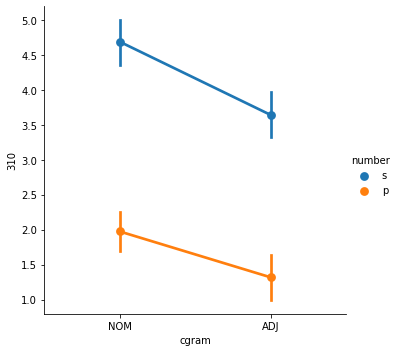

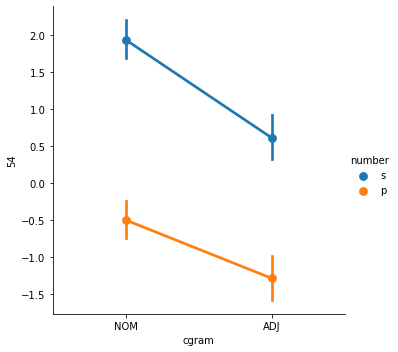

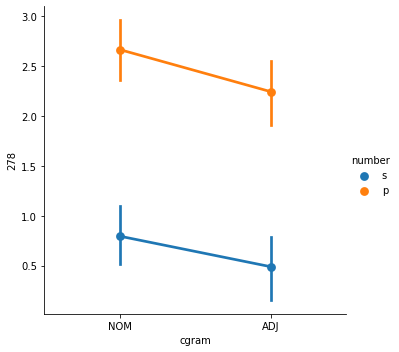

In [294]:
sns.catplot(x="cgram", y="310", hue='number', data=df_a_adj, kind='point')
sns.catplot(x="cgram", y="54", hue='number', data=df_a_adj, kind='point')
sns.catplot(x="cgram", y="278", hue='number', data=df_a_adj, kind='point')

Test de correlation of other  dimensions : 5, 106, 384,  288  with cgram : NOM, ADJ , number : singular , plural.

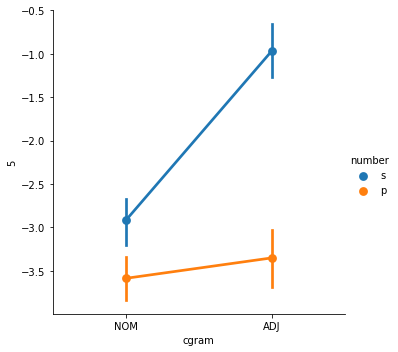

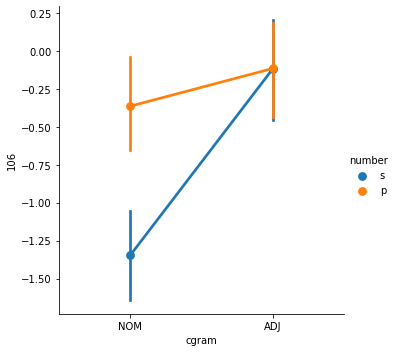

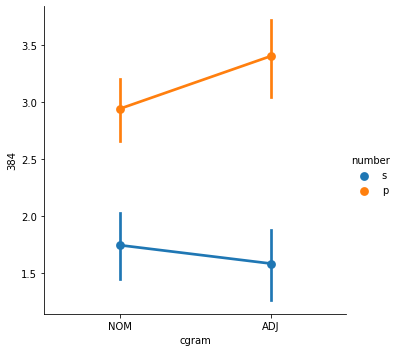

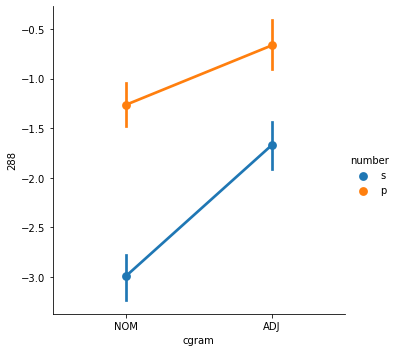

In [295]:

sns.catplot(x="cgram", y="5", hue='number', data=df_a_adj, kind='point')
sns.catplot(x="cgram", y="106", hue='number', data=df_a_adj, kind='point')
sns.catplot(x="cgram", y="384", hue='number', data=df_a_adj, kind='point')
sns.catplot(x="cgram", y="288", hue='number', data=df_a_adj, kind='point')



From the above results, it seems that common dimension : 310, 54, 278 have a parallel relationship between singular, plural nouns and singular, plural adjectives, but other dimensions do not.

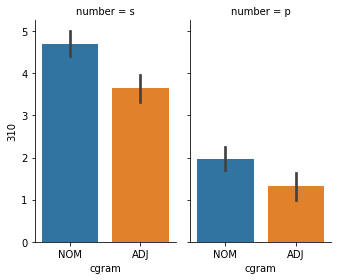

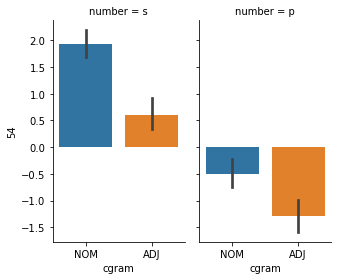

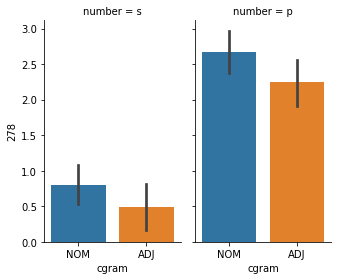

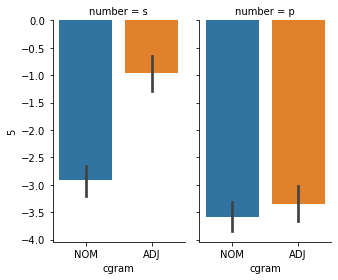

In [251]:
sns.catplot(data=df_a_adj, x="cgram", y="310", col="number",kind="bar", height=4, aspect=.6,)
sns.catplot(data=df_a_adj, x="cgram", y="54", col="number",kind="bar", height=4, aspect=.6,)
sns.catplot(data=df_a_adj, x="cgram", y="278", col="number",kind="bar", height=4, aspect=.6,)
sns.catplot(data=df_a_adj, x="cgram", y="5", col="number",kind="bar", height=4, aspect=.6,)
